# Model 1

## Libraries

In [622]:
%reload_ext autoreload
%autoreload 2

# visualisation and data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 200)


# system and files managment
import os
import sys
import pickle
import ast
import collections

# model splits
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# model
import xgboost as xg

import warnings
warnings.filterwarnings('ignore')

In [7]:
# modules added to system path
path_tools = os.path.abspath(r'/Users/starignus/Documents/Programing/Practise_jobexam/FDA/Airbnb')
sys.path.extend([path_tools])

In [522]:
# exploring tools module
import tools.exploring_tools as mtool 
import tools.feature_selection as fselec
import tools.model_selection as mselec

## Paths

In [14]:
path_project = r'/Users/starignus/Documents/Programing/Practise_jobexam/FDA/'
path_input = os.path.join(path_project, 'Data', 'inputs')
path_ouput = os.path.join(path_project, 'Data', 'outputs')
listings = os.path.join(path_input, 'listings.csv')
data_set = os.path.join(path_input, 'extended_data_set.pickle')

## Upload Data

In [77]:
df = pd.read_pickle(data_set)

## Variables list

In [82]:
var_set_1 = [
'price_log',
'latitude',
'longitude',
'accommodates',
'bedrooms',
'beds',
'minimum_nights',
'maximum_nights',
'minimum_minimum_nights',
'maximum_minimum_nights',
'minimum_maximum_nights',
'maximum_maximum_nights',
'minimum_nights_avg_ntm',
'maximum_nights_avg_ntm',
'has_availability',
'availability_30',
'availability_60',
'availability_90',
'availability_365',
'bathrooms',
'bathrooms_shared',
'number_amenities',
'room_type_num']

var_amenties = ['wifi',
'heating',
'essentials',
'kitchen',
'smoke_alarm',
'washer',
'hangers',
'iron',
'tv',
'hair_dryer',
'shampoo',
'dedicated_workspace',
'carbon_monoxide_alarm',
'hot_water',
'dryer',
'refrigerator',
'dishes_and_silverware',
'cooking_basics',
'oven',
'bed_linens',
'microwave',
'stove',
'fire_extinguisher',
'first_aid_kit',
'private_entrance',
'dishwasher',
'coffee_maker',
'long_term_stays_allowed',
'elevator',
'free_parking_on_premises',
'extra_pillows_and_blankets',
'lock_on_bedroom_door',
'host_greets_you',
'cable_tv',
'luggage_dropoff_allowed',
'patio_or_balcony',
'garden_or_backyard',
'breakfast',
'paid_parking_off_premises',
'lockbox',
'free_street_parking',
'bathtub']

## split data set 

In [80]:
y = df['price_log'].values

In [83]:
X = df[var_set_1[1:] + var_amenties].copy()

In [84]:
X.head()

,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,bathrooms,bathrooms_shared,number_amenities,room_type_num,wifi,heating,essentials,kitchen,smoke_alarm,washer,hangers,iron,tv,hair_dryer,shampoo,dedicated_workspace,carbon_monoxide_alarm,hot_water,dryer,refrigerator,dishes_and_silverware,cooking_basics,oven,bed_linens,microwave,stove,fire_extinguisher,first_aid_kit,private_entrance,dishwasher,coffee_maker,long_term_stays_allowed,elevator,free_parking_on_premises,extra_pillows_and_blankets,lock_on_bedroom_door,host_greets_you,cable_tv,luggage_dropoff_allowed,patio_or_balcony,garden_or_backyard,breakfast,paid_parking_off_premises,lockbox,free_street_parking,bathtub
0,51.46225,-0.11732,4,1.0,3.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,1.0,3,33,63,338,1.0,0.0,28,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,51.56802,-0.11121,2,1.0,0.0,1,29,1.0,1.0,29.0,29.0,1.0,29.0,1.0,30,60,90,365,1.0,1.0,41,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
2,51.48796,-0.16898,2,1.0,1.0,10,50,10.0,10.0,50.0,50.0,10.0,50.0,1.0,29,59,62,189,1.0,0.0,24,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,51.52195,-0.14094,6,3.0,3.0,4,365,4.0,4.0,365.0,365.0,4.0,365.0,1.0,16,16,16,231,2.0,0.0,27,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,51.47935,-0.19743,2,1.0,1.0,3,21,3.0,3.0,21.0,21.0,3.0,21.0,1.0,29,59,89,364,1.0,0.0,16,2,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

In [86]:
y_train

array([3.33220451, 4.15888308, 4.31748811, ..., 4.38202663, 3.55534806,
       3.09104245])

# Feature selection

Performance of the model with all the variabels avialable to be used.

In [333]:
# Instantiation 
clf = xg.XGBRegressor(objective ='reg:squarederror', 
                      max_depth=3, 
                      n_estimators=100, 
                      random_state=0)

The feature importance measure taken is **gain** which is the average contribution of the feature to the model  across all the trees. A higher value of this metric when compared to another feature implies it is more important for generating a prediction. This metric ease the interpretation of the relative importance of each feature.

The idea of Gain is to account for the improvement in accuracy brought by a feature to the branches it is on. The main idea is that before adding a new split on a feature $x_i$ to the branch there was some wrongly classified elements, after adding the split on this feature, there are two new branches, and each of these branch is more accurate. Meaning that an observation on this branch will be classified as one, and on the other branch the opotite.

There are another importance messures like **weight** that is the number of times a feature is used to split the data across all trees; and **coverage** that is defined as the number of samples/observations affected by the split.

In [157]:
# set importance type to gain rather than default 'split'
clf.set_params(importance_type='gain')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [158]:
clf.fit(X_train, y_train, verbose=True)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [90]:
# Predict the model 
pred = clf.predict(X_test) 

In [69]:
def RMSE(y_true, y_pred):
    return np.sqrt(MSE(y_true, y_pred))

In [91]:
# RMSE Computation 
rmse = np.sqrt(MSE(y_test, pred)) 
print("RMSE : % f" %(rmse))

RMSE :  0.400235


In [155]:
# error in the unts of £ since we did a log transformation of the price to model it
np.exp(0.400235)

1.4921753176414525

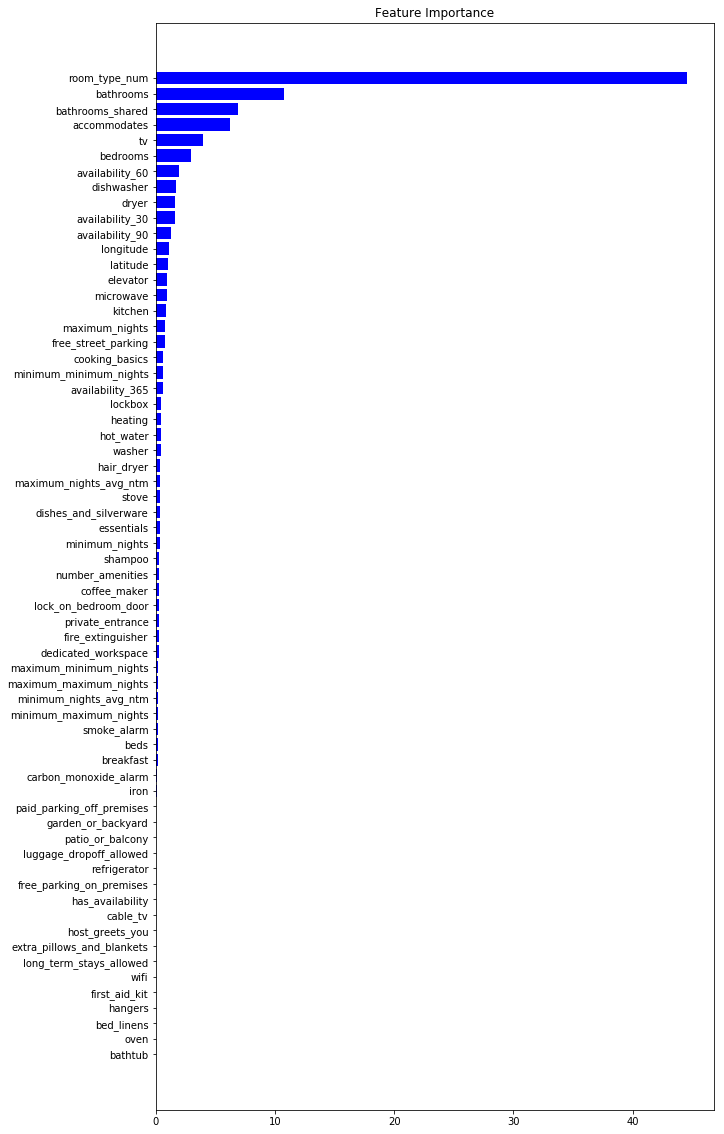

In [94]:
df_feat_import_1 = fselec.feature_importance(clf, model_type='Uncalibrated', feature_list=list(X_train.columns))

In [120]:
df_feat_import_1.head(25)

,Feature_importance%
room_type_num,44.551601
bathrooms,10.771441
bathrooms_shared,6.925835
accommodates,6.229731
tv,3.979994
bedrooms,2.972055
availability_60,1.982256
dishwasher,1.748774
dryer,1.629311
availability_30,1.620284


It will be fitted the mode agian but evaluating at the same time. This can be done by passing the evaluation sets to the ```fit``` isntance.

In [159]:
eval_set = [(X_train, y_train), (X_test, y_test)] 

In [334]:
clf.fit(X_train, y_train, eval_metric=["rmse", "mae"], eval_set=eval_set, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [335]:
# Predict the model 
pred_1 = clf.predict(X_test) 

In [336]:
# evaluating prediction
rmse_1 = RMSE(y_test, pred_1)

In [337]:
rmse_1

0.40023450030435226

In [338]:
# retrieve performance metrics
results = clf.evals_result()

Text(0.5, 0, 'Boosting trees')

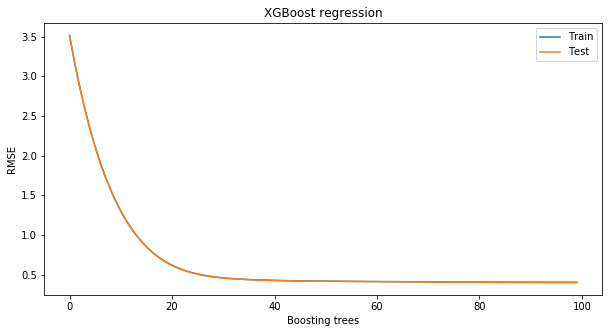

In [339]:
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBoost regression')
plt.xlabel('Boosting trees')

Running to test adding an early stop to the boosting rounds.

In [484]:
# Instantiation 
clf_test = xg.XGBRegressor(objective ='reg:squarederror', 
                      max_depth=2, 
                      n_estimators=50, 
                      random_state=0)

In [485]:
# set importance type to gain rather than default 'split'
clf_test.set_params(importance_type='gain')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=50,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [486]:
clf_test.fit(X_train, y_train, eval_metric=["rmse"], eval_set=eval_set, early_stopping_rounds=40, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=50,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [487]:
# Predict the model 
pred_1 = clf_test.predict(X_test, ntree_limit=clf_test.best_ntree_limit) 
pred_1

array([4.632261 , 4.055711 , 4.1891146, ..., 3.6586137, 4.018154 ,
       3.592351 ], dtype=float32)

In [488]:
pred_1 = clf_test.predict(X_test) 
pred_1

array([4.632261 , 4.055711 , 4.1891146, ..., 3.6586137, 4.018154 ,
       3.592351 ], dtype=float32)

In [230]:
# evaluating prediction
rmse_1 = RMSE(y_test, pred_1)

In [231]:
rmse_1

0.431931152084622

In [489]:
# retrieve performance metrics
results = clf_test.evals_result()

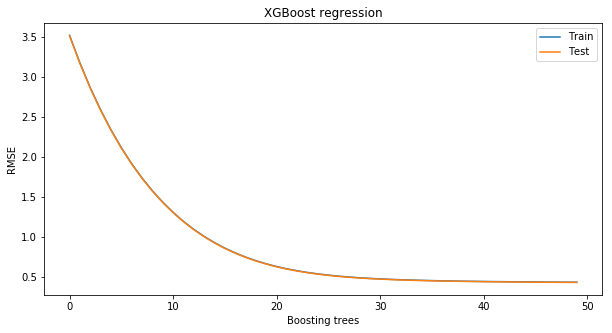

In [490]:
fselec.xgboost_learning_curve(results)

## Genetic Algorithm run for feature selection
In this notebook it could be just run one round with 2 reuslts of GA. So the strategy to not lose time was:

1. Working on the selection of variables from the 2 rounds and use feature importance to select the variables and then tune the model.
2. While doing the first point, the GA algorithm is run in an notebook in Colab notebooks in google platform. The features from the final GA round will be taking to the same structure of this notebook to tune the final model.

In [66]:
clf_fs = xg.XGBRegressor(objective ='reg:squarederror', 
                        max_depth=3, 
                        n_estimators=100, 
                        random_state=0)

In [67]:
# set importance type to gain rather than default 'split'
clf_fs.set_params(importance_type='gain')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [68]:
X.shape

(76114, 63)

In [72]:
bests_chromos_hlf_4, best_scores_hlf_4 = fselec.generations_v4(size=200,
                                                              n_feat=X.shape[1],
                                                              metric=RMSE,
                                                              clf=clf_fs,
                                                              n_parents=100,
                                                              mutation_rate=0.2, 
                                                              n_generations=25,
                                                              X_train=X_train,
                                                              y_train=y_train,
                                                              percent_not_feat=0.3,
                                                              seed=42,
                                                              random_state_fit=42,
                                                              classification=False,
                                                              early_stop_ths=0.005)

[0.4084518727764017, 0.4087582363780873]
[0.4084518727764017, 0.4087087067010991]


In [73]:
bests_chromos_hlf_4

[array([ True,  True,  True,  True, False,  True,  True, False,  True,
         True, False, False, False,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True, False, False,
         True,  True,  True,  True, False, False, False, False,  True,
         True,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True, False, False,  True, False,  True,  True,  True,
         True,  True, False,  True,  True, False,  True,  True,  True]),
 array([ True,  True,  True,  True, False,  True,  True, False,  True,
         True, False, False, False,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True, False, False,
         True,  True,  True,  True, False, False, False, False,  True,
         True,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True, False, False,  True, False,  True,  True,  True,
         True,  True, False,  True,  True, False,  True,  True,  True])]

In [95]:
list_compare = fselec.bests_chromos_coparison(bests_chromos=bests_chromos_hlf_4, 
                                              best_scores=best_scores_hlf_4)

In [96]:
list_compare

[(0, 'c0-1', True, 'sc-0', 0.4084518727764017, '# features 45'),
 (1, 'c1-0', True, 'sc-1', 0.4084518727764017, '# features 45')]

In [109]:
#print(bests_chromos_hlf_4[-1])
gen_list_outp = list(X_train.iloc[:,bests_chromos_hlf_4[-1]].columns)

In [128]:
len(gen_list_outp)

45

In [101]:
#print(bests_chromos_hlf_4[-1])
X_train.iloc[:,bests_chromos_hlf_4[-2]].columns

Index(['latitude', 'longitude', 'accommodates', 'bedrooms', 'minimum_nights',
       'maximum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_365', 'bathrooms', 'bathrooms_shared', 'number_amenities',
       'room_type_num', 'wifi', 'heating', 'essentials', 'washer', 'hangers',
       'iron', 'tv', 'hot_water', 'dryer', 'refrigerator',
       'dishes_and_silverware', 'cooking_basics', 'oven', 'microwave', 'stove',
       'fire_extinguisher', 'first_aid_kit', 'private_entrance',
       'long_term_stays_allowed', 'free_parking_on_premises',
       'extra_pillows_and_blankets', 'lock_on_bedroom_door', 'host_greets_you',
       'cable_tv', 'patio_or_balcony', 'garden_or_backyard',
       'paid_parking_off_premises', 'lockbox', 'free_street_parking'],
      dtype='object')

Traing now a model with the best features from GA.

In [234]:
clf_2 = xg.XGBRegressor(objective ='reg:squarederror', 
                        max_depth=3, 
                        n_estimators=100, 
                        random_state=0)

In [235]:
# set importance type to gain rather than default 'split'
clf_2.set_params(importance_type='gain')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [237]:
eval_set_2 = [(X_train[gen_list_outp], y_train), (X_test[gen_list_outp], y_test)] 

In [238]:
clf_2.fit(X_train[gen_list_outp], y_train, eval_set=eval_set_2)

[0]	validation_0-rmse:3.51494	validation_1-rmse:3.50848
[1]	validation_0-rmse:3.17021	validation_1-rmse:3.16397
[2]	validation_0-rmse:2.86087	validation_1-rmse:2.85482
[3]	validation_0-rmse:2.58314	validation_1-rmse:2.57731
[4]	validation_0-rmse:2.33402	validation_1-rmse:2.32839
[5]	validation_0-rmse:2.11064	validation_1-rmse:2.10514
[6]	validation_0-rmse:1.91057	validation_1-rmse:1.90511
[7]	validation_0-rmse:1.73151	validation_1-rmse:1.72641
[8]	validation_0-rmse:1.57151	validation_1-rmse:1.56645
[9]	validation_0-rmse:1.42857	validation_1-rmse:1.42366
[10]	validation_0-rmse:1.30112	validation_1-rmse:1.29625
[11]	validation_0-rmse:1.18795	validation_1-rmse:1.18321
[12]	validation_0-rmse:1.08741	validation_1-rmse:1.08283
[13]	validation_0-rmse:0.998482	validation_1-rmse:0.994131
[14]	validation_0-rmse:0.919942	validation_1-rmse:0.915774
[15]	validation_0-rmse:0.850912	validation_1-rmse:0.846812
[16]	validation_0-rmse:0.79036	validation_1-rmse:0.786327
[17]	validation_0-rmse:0.737515	va

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [135]:
X_train[gen_list_outp].shape

(60891, 45)

In [137]:
X_test[gen_list_outp].shape

(15223, 45)

In [239]:
# Predict the model 
pred_2 = clf_2.predict(X_test[gen_list_outp]) 

In [427]:
# RMSE Computation 
rmse_2 = RMSE(y_test, pred_2) 
print("RMSE : % .4f" %(rmse_2))

RMSE :  0.4033


In [243]:
# retrieve performance metrics
results_2 = clf_2.evals_result()

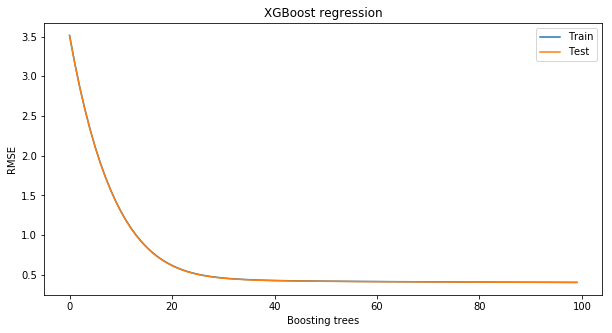

In [482]:
fselec.xgboost_learning_curve(results_2)

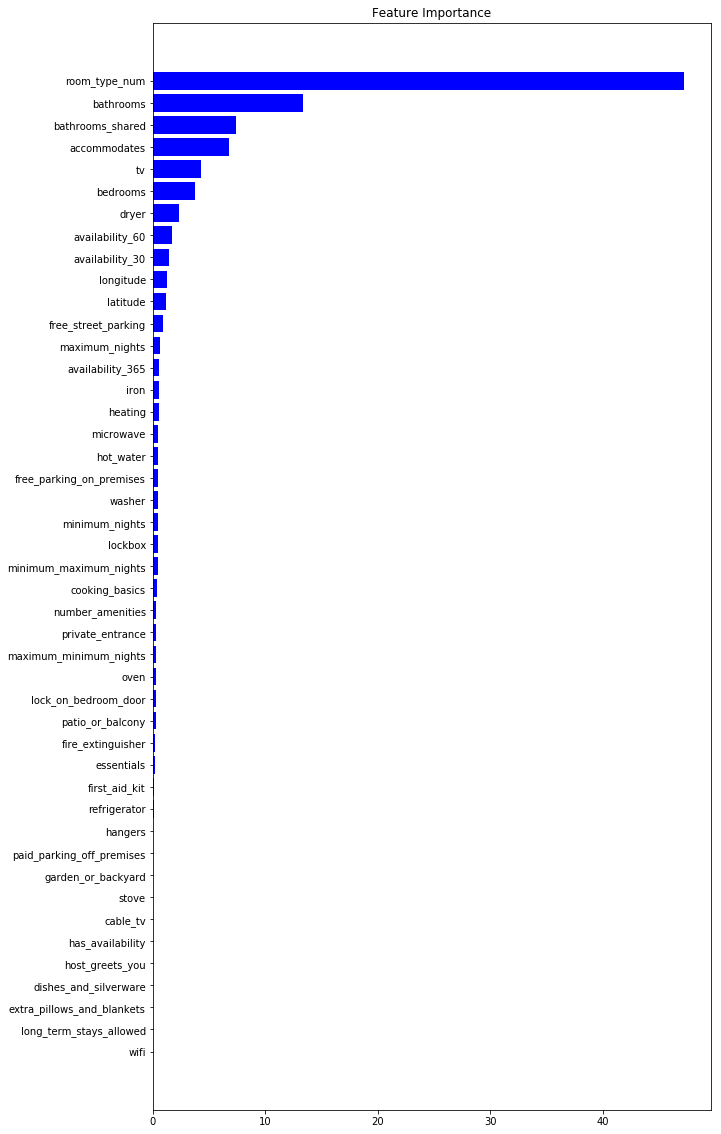

In [241]:
df_feat_import_2 = fselec.feature_importance(clf_2, model_type='Uncalibrated', feature_list=gen_list_outp)

In [298]:
# We can still see from here 
df_feat_import_2.head(20)

,Feature_importance%
room_type_num,47.271057
bathrooms,13.383547
bathrooms_shared,7.386096
accommodates,6.786115
tv,4.295228
bedrooms,3.741576
dryer,2.367606
availability_60,1.675846
availability_30,1.458146
longitude,1.237923


In [299]:
df_feat_import_1.head(20)

,Feature_importance%
room_type_num,44.551601
bathrooms,10.771441
bathrooms_shared,6.925835
accommodates,6.229731
tv,3.979994
bedrooms,2.972055
availability_60,1.982256
dishwasher,1.748774
dryer,1.629311
availability_30,1.620284


In [302]:
# difference of top 13 variables in the feature importance
# of model 1 with all the variables and model 2 with the 45 variables from te genetic algorithm
list_not_common = list(set(df_feat_import_1.index[:20]).symmetric_difference(set(list(df_feat_import_2.index[:20]))))
list_not_common

['free_parking_on_premises',
 'dishwasher',
 'washer',
 'elevator',
 'heating',
 'hot_water',
 'availability_365',
 'availability_90',
 'iron',
 'minimum_minimum_nights',
 'kitchen',
 'cooking_basics']

Lets fit a model with this variables and look at the feature importance.

In [303]:
# 11 they have in common 
intersect_with_top_gen = list(set(df_feat_import_1.index[:20]).intersection(df_feat_import_2.index[:20]))
intersect_with_top_gen

['longitude',
 'accommodates',
 'room_type_num',
 'availability_30',
 'bathrooms_shared',
 'free_street_parking',
 'tv',
 'microwave',
 'dryer',
 'availability_60',
 'latitude',
 'bedrooms',
 'maximum_nights',
 'bathrooms']

In [382]:
var_3_list = list_not_common + intersect_with_top_gen

In [305]:
corr_spear_3 = df[var_3_list + ['price_log']].corr(method='spearman').abs()

In [306]:
cmap = sns.diverging_palette(250, 10, as_cmap=True)

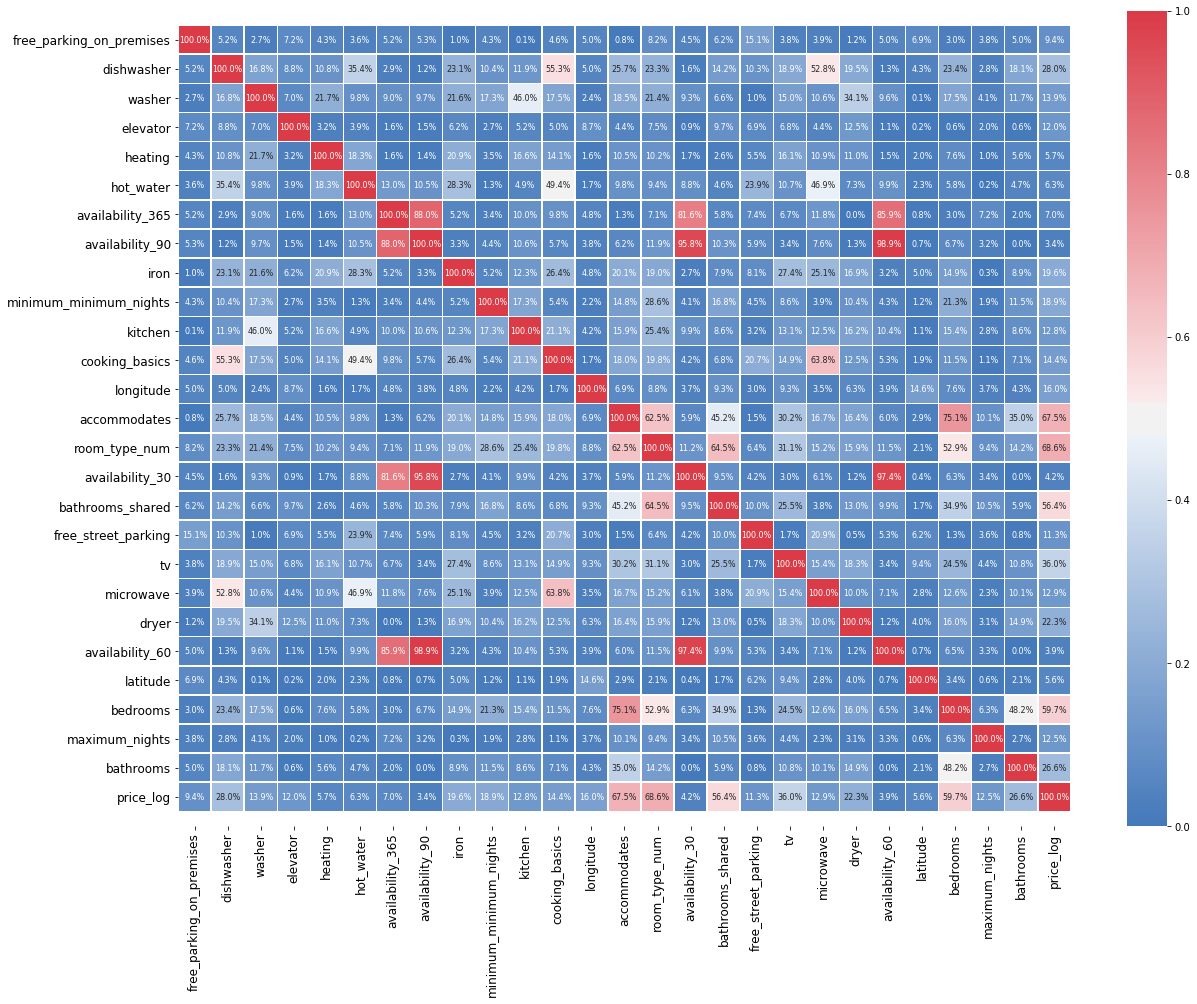

In [307]:
mtool.heat_map_corr(corr_spear_3, cmap, square=False, annot=True)

acomodates is more correlted first with bedrooms and then with room_type_num. They bring the same information. So we can remove 'accomodate'.The same with avialabilities, so I will remove those less correlationated with price: availability_90, and availability_60. We keep a long term and short term version of the variable: 365 and 30 days.

In [383]:
var_3_list.remove('accommodates')
var_3_list.remove('availability_60')
var_3_list.remove('availability_90')

Then 'coking_basics', 'microwave', and 'diswasher' are correlated. They bring almst the same information. 

In [323]:
# checking proportions
df['cooking_basics'].value_counts() / df.shape[0]

0.0    0.627086
1.0    0.372914
Name: cooking_basics, dtype: float64

In [324]:
df['microwave'].value_counts() / df.shape[0]

0.0    0.645282
1.0    0.354718
Name: microwave, dtype: float64

In [325]:
df['dishwasher'].value_counts() / df.shape[0]

0.0    0.761043
1.0    0.238957
Name: dishwasher, dtype: float64

In [326]:
X_train['cooking_basics'].value_counts() / X.shape[0]

0.0    0.502536
1.0    0.297462
Name: cooking_basics, dtype: float64

In [328]:
X_train['microwave'].value_counts() / X.shape[0]

0.0    0.517145
1.0    0.282852
Name: microwave, dtype: float64

In [331]:
X_train['dishwasher'].value_counts() / X.shape[0]

0.0    0.608627
1.0    0.191371
Name: dishwasher, dtype: float64

In [327]:
X_test['cooking_basics'].value_counts() / X.shape[0]

0.0    0.124550
1.0    0.075453
Name: cooking_basics, dtype: float64

In [329]:
X_test['microwave'].value_counts() / X.shape[0]

0.0    0.128137
1.0    0.071866
Name: microwave, dtype: float64

In [330]:
X_test['dishwasher'].value_counts() / X.shape[0]

0.0    0.152416
1.0    0.047587
Name: dishwasher, dtype: float64

In [384]:
var_3_list.remove('dishwasher')

In [385]:
var_3_list.remove('microwave')

In [386]:
var_3_list

['free_parking_on_premises',
 'washer',
 'elevator',
 'heating',
 'hot_water',
 'availability_365',
 'iron',
 'minimum_minimum_nights',
 'kitchen',
 'cooking_basics',
 'longitude',
 'room_type_num',
 'availability_30',
 'bathrooms_shared',
 'free_street_parking',
 'tv',
 'dryer',
 'latitude',
 'bedrooms',
 'maximum_nights',
 'bathrooms']

In [358]:
clf_3 = xg.XGBRegressor(objective ='reg:squarederror', 
                        max_depth=3, 
                        n_estimators=100, 
                        random_state=0)

In [359]:
# set importance type to gain rather than default 'split'
clf_3.set_params(importance_type='gain')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [360]:
eval_set_3 = [(X_train[var_3_list], y_train), (X_test[var_3_list], y_test)] 

In [361]:
clf_3.fit(X_train[var_3_list], y_train, eval_set=eval_set_3, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [362]:
X_train[var_3_list].shape

(60891, 21)

In [363]:
X_train[var_3_list].head()

,free_parking_on_premises,washer,elevator,heating,hot_water,availability_365,iron,minimum_minimum_nights,kitchen,cooking_basics,longitude,room_type_num,availability_30,bathrooms_shared,free_street_parking,tv,dryer,latitude,bedrooms,maximum_nights,bathrooms
73063,0.0,1.0,0.0,1.0,0.0,364,0.0,1.0,1.0,0.0,-0.20365,2,29,1.0,0.0,0.0,0.0,51.48142,1.0,1125,1.0
20196,0.0,1.0,0.0,1.0,1.0,151,1.0,3.0,1.0,0.0,-0.11610,1,9,0.0,0.0,1.0,0.0,51.49249,1.0,365,1.0
54900,0.0,1.0,0.0,1.0,1.0,180,1.0,1.0,1.0,0.0,-0.10912,2,30,0.0,0.0,1.0,0.0,51.45595,1.0,3,1.5
72774,0.0,0.0,0.0,1.0,1.0,359,0.0,1.0,0.0,0.0,-0.23976,2,24,0.0,0.0,1.0,0.0,51.53232,1.0,1125,1.0
16239,1.0,0.0,0.0,1.0,1.0,365,1.0,2.0,0.0,1.0,-0.02929,2,30,1.0,1.0,1.0,0.0,51.47559,1.0,1125,1.5


In [369]:
# Predict the model 
pred_3 = clf_3.predict(X_test[var_3_list]) 

In [426]:
# RMSE Computation 
rmse_3 = RMSE(y_test, pred_3) 
print("RMSE : % .4f" %(rmse_3))

RMSE :  0.4145


In [371]:
# retrieve performance metrics
results_3 = clf_3.evals_result()

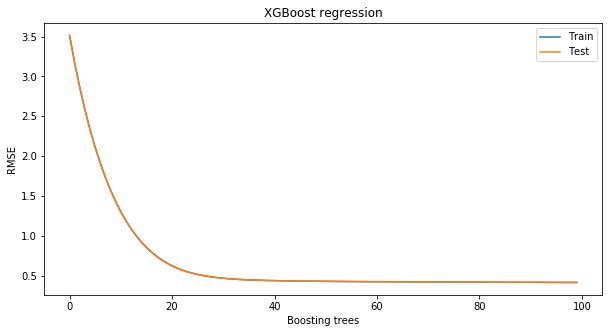

In [481]:
fselec.xgboost_learning_curve(results_3)

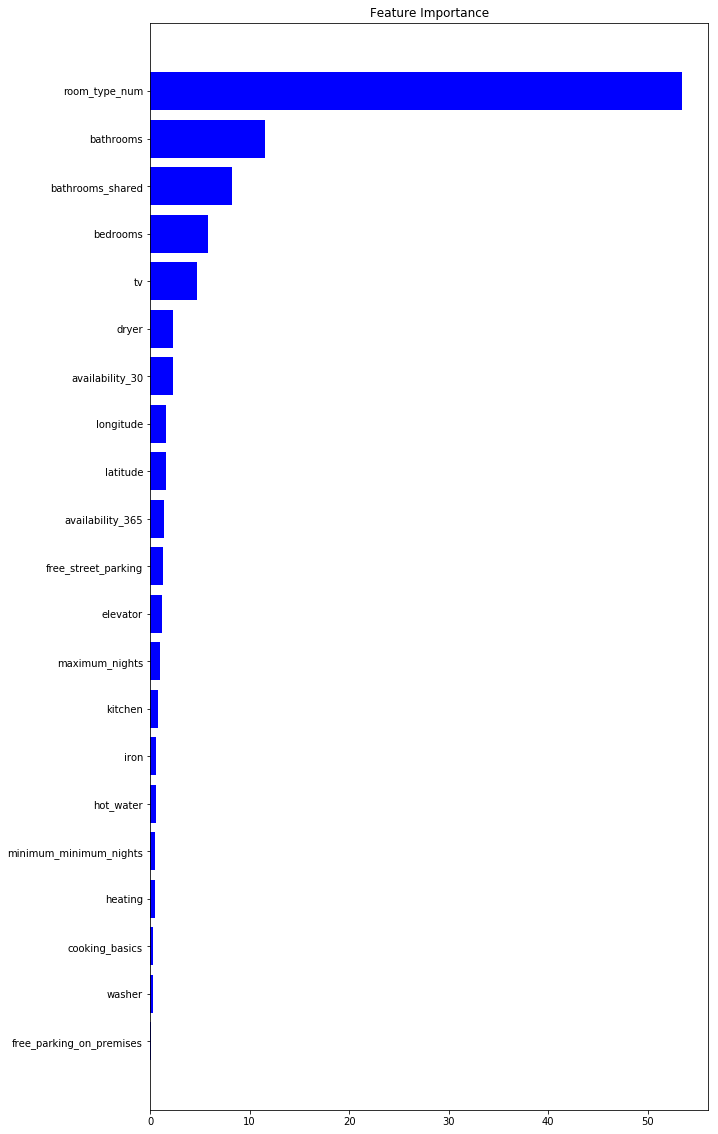

In [373]:
df_feat_import_3 = fselec.feature_importance(clf_3, model_type='Uncalibrated', feature_list=var_3_list)

In [374]:
# We can still see from here 
df_feat_import_3

,Feature_importance%
room_type_num,53.396809
bathrooms,11.553446
bathrooms_shared,8.204745
bedrooms,5.842857
tv,4.677170
dryer,2.339184
availability_30,2.261306
longitude,1.635839
latitude,1.596290
availability_365,1.432364


The top 15 will be taken.

In [380]:
df_feat_import_3.iloc[0:14]

,Feature_importance%
room_type_num,53.396809
bathrooms,11.553446
bathrooms_shared,8.204745
bedrooms,5.842857
tv,4.677170
dryer,2.339184
availability_30,2.261306
longitude,1.635839
latitude,1.596290
availability_365,1.432364


In [387]:
var_4_list = list(df_feat_import_3.iloc[0:14].index)

In [388]:
corr_spear_4 = df[var_4_list + ['price_log']].corr(method='spearman').abs()

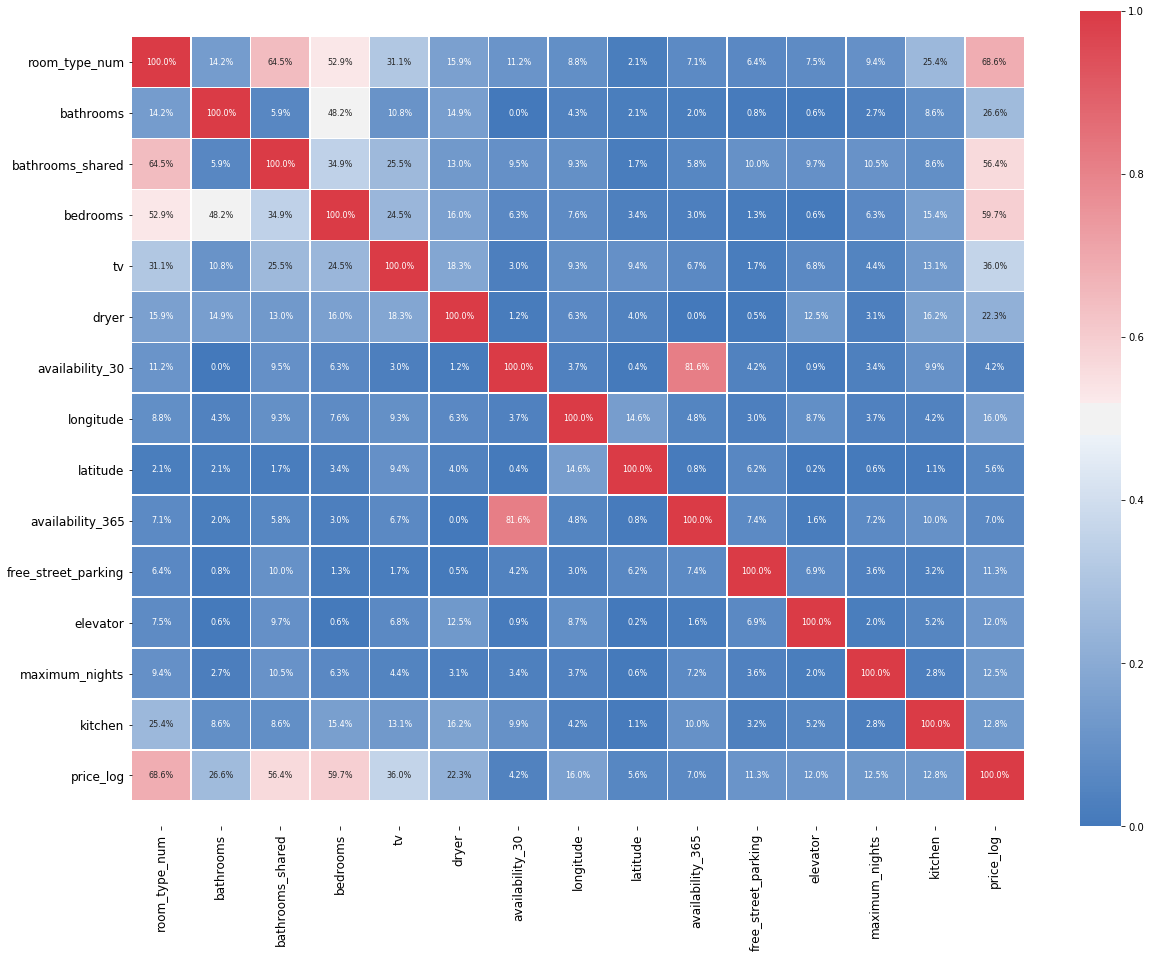

In [389]:
mtool.heat_map_corr(corr_spear_4, cmap, square=False, annot=True)

In [390]:
clf_4 = xg.XGBRegressor(objective ='reg:squarederror', 
                        max_depth=3, 
                        n_estimators=100, 
                        random_state=0)

In [391]:
# set importance type to gain rather than default 'split'
clf_4.set_params(importance_type='gain')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [392]:
eval_set_4 = [(X_train[var_4_list], y_train), (X_test[var_4_list], y_test)] 

In [393]:
clf_4.fit(X_train[var_4_list], y_train, eval_set=eval_set_4, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [394]:
X_train[var_4_list].shape

(60891, 14)

In [395]:
X_train[var_4_list].head()

,room_type_num,bathrooms,bathrooms_shared,bedrooms,tv,dryer,availability_30,longitude,latitude,availability_365,free_street_parking,elevator,maximum_nights,kitchen
73063,2,1.0,1.0,1.0,0.0,0.0,29,-0.20365,51.48142,364,0.0,0.0,1125,1.0
20196,1,1.0,0.0,1.0,1.0,0.0,9,-0.11610,51.49249,151,0.0,0.0,365,1.0
54900,2,1.5,0.0,1.0,1.0,0.0,30,-0.10912,51.45595,180,0.0,0.0,3,1.0
72774,2,1.0,0.0,1.0,1.0,0.0,24,-0.23976,51.53232,359,0.0,0.0,1125,0.0
16239,2,1.5,1.0,1.0,1.0,0.0,30,-0.02929,51.47559,365,1.0,0.0,1125,0.0


In [396]:
# Predict the model 
pred_4 = clf_4.predict(X_test[var_4_list]) 

In [425]:
# RMSE Computation 
rmse_4 = RMSE(y_test, pred_4) 
print("RMSE : % .4f" %(rmse_4))

RMSE :  0.4173


In [401]:
# retrieve performance metrics
results_4 = clf_4.evals_result()

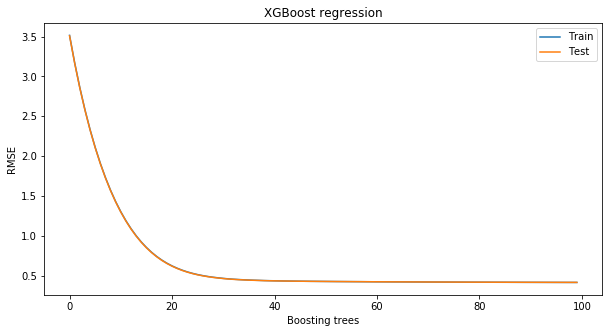

In [478]:
fselec.xgboost_learning_curve(results_4)

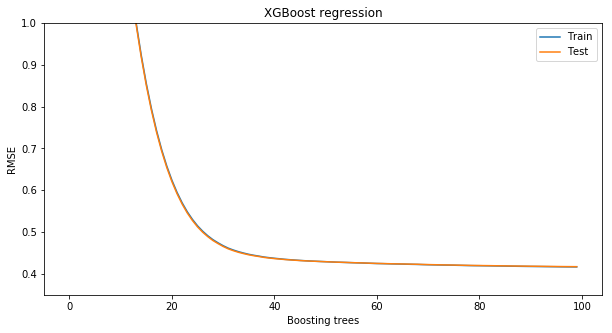

In [477]:
fselec.xgboost_learning_curve(results_4, y_lim=[0.35, 1])

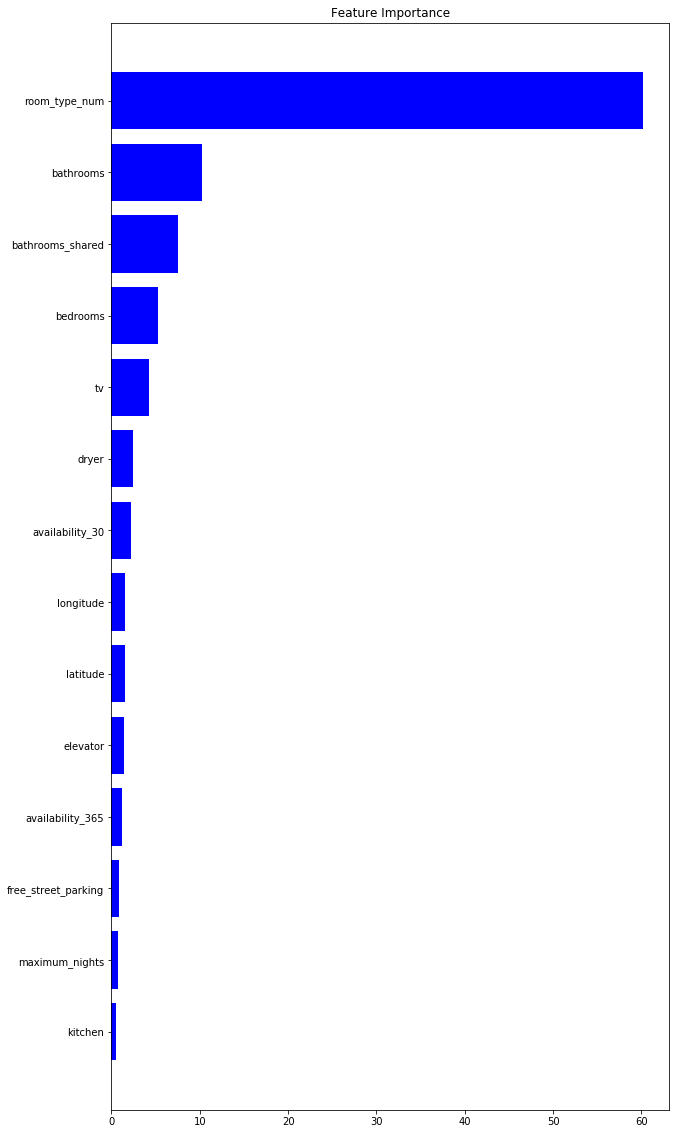

In [404]:
df_feat_import_4 = fselec.feature_importance(clf_4, model_type='Uncalibrated', feature_list=var_4_list)

Therefore we got 14 variables that can go to our model.

To quantfiy the imporvement in perfomrance in our different rounds, including the feature selection process and parameter tunning,a base line model will be biuld. To keep things simple the base line model predicts that the best price is the the mean value of our training set.

In [405]:
# "Learn" the mean from the training data
mean_train = np.mean(y_train)
# Get predictions on the test set
baseline_predictions_0 = np.ones(y_test.shape) * mean_train

In [424]:
# Compute RMSE
rmse_baseline = RMSE(y_test, baseline_predictions_0)
print("Baseline RMSE is {:.4f}".format(rmse_baseline))

Baseline RMSE is 0.7305


In [409]:
np.exp(rmse_baseline)

2.0760583573459903

All the rounds for feature selection gives a smaller error. So all of them perform better than the base line. 

# Training and tunning

Some of the parameters of XGboost have different name as the ones used in skleanr. But since XGboost module in python has an sklearn wrapper it uses sklearn style naming convention too. The parameters names which will change are:

* ```eta``` –> ```learning_rate```
* ```lambda``` –> ```reg_lambda```
* ```alpha``` –> ```reg_alpha```


In sklern style we have as well ```n_estimators``` parameter in GBM. Well this exists as a parameter in XGBClassifier and XGBRegressor. Sometimes is called ```num_boosting_rounds```[(Ref 1)](https://xgboost.readthedocs.io/en/latest/python/python_api.html), [(Ref 2)](https://xgboost.readthedocs.io/en/latest/parameter.html).

In [415]:
# starting with parameters of the model with 14 variables
params = {
    # Parameters to tune.
    'max_depth':3,
    'min_child_weight': 1,
#     'eta':.3, the sames as learnig rate
    'subsample': 1,
    'colsample_bytree': 1,
    'learnig_rate':0.1,
    'reg_lambda':1,
    # Other parameters
    'objective':'reg:squarederror',
    'random_state':0,
    'eval_metric': 'rmse',
    'importance_type':'gain'
}

Before tunning the parameters in the dictionary, first I will look how to get the number of boosters or estimators to build. ```n_estimators``` is the same ```num_boost_round```. Its optimal value highly depends on the other parameters, and thus it should be re-tuned each time you update a parameter. You could do this by tuning it together with all parameters in a grid-search, but it requires a lot of computational effort.

Tehrefore, it can be used the method of XGBoost that provides a good way to find the best number of estimators whilst training. In XGboost, the trees are built sequentially instead of fixing the number of rounds at the beginning, the model can be test at each step and see if adding a new tree/round improves performance.

```num_boost_round``` are the maximum number of trees or boosting rounds that will be allowed. So it can be set to a large number hoping to find the optimal number before reaching it. If we find it has not improved the performance on the test set, it can be used the ```early_stopping_round rounds``` to stop the training and keep the best number of boosting rounds. If we set up to 10, it means that from a current point of evaluation, it will continue 10 more times and asses if there is still significative improvement by addding more trees. If that is not the case, when ending the 10 round it will stop.

Here I explore first how it will be used to train the model once the parameters are tuned, so the best numbers of rounds or booster are found.

In [416]:
num_boost_round = 999

In [411]:
dtrain = xg.DMatrix(X_train[var_4_list], label=y_train)
dtest = xg.DMatrix(X_test[var_4_list], label=y_test)

In [491]:
model_0 = xg.train(params,
                    dtrain,
                    num_boost_round=num_boost_round,
                    evals=[(dtest, "Test")],
                    early_stopping_rounds=10)

[0]	Test-rmse:2.74495
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:1.95054
[2]	Test-rmse:1.40488
[3]	Test-rmse:1.03787
[4]	Test-rmse:0.796947
[5]	Test-rmse:0.645563
[6]	Test-rmse:0.555186
[7]	Test-rmse:0.503061
[8]	Test-rmse:0.473312
[9]	Test-rmse:0.456405
[10]	Test-rmse:0.447076
[11]	Test-rmse:0.441055
[12]	Test-rmse:0.436569
[13]	Test-rmse:0.433684
[14]	Test-rmse:0.431826
[15]	Test-rmse:0.430268
[16]	Test-rmse:0.428708
[17]	Test-rmse:0.427921
[18]	Test-rmse:0.426984
[19]	Test-rmse:0.425944
[20]	Test-rmse:0.425357
[21]	Test-rmse:0.424427
[22]	Test-rmse:0.423689
[23]	Test-rmse:0.422952
[24]	Test-rmse:0.422397
[25]	Test-rmse:0.42186
[26]	Test-rmse:0.421244
[27]	Test-rmse:0.42036
[28]	Test-rmse:0.420047
[29]	Test-rmse:0.419291
[30]	Test-rmse:0.418834
[31]	Test-rmse:0.418598
[32]	Test-rmse:0.418404
[33]	Test-rmse:0.418015
[34]	Test-rmse:0.417787
[35]	Test-rmse:0.417342
[36]	Test-rmse:0.416975
[37]	Test-rmse:0.416619
[38]	Test-rmse:0.416384
[39]	Test-rmse:0.416012

In [578]:
print("Best RMSE: {:.4f} with {} rounds".format(
                 model_0.best_score,
                 model_0.best_iteration + 1))

Best RMSE: 0.4056 with 306 rounds


In [579]:
# If early stop happens
model_0.best_ntree_limit

306

The model with the defined parameters was trained with more rounds than optimal, and the RMSE is about 0.4056

```ntree_limit```is an integer number that limits the number of trees in the prediction; defaults to ```best_ntree_limit``` if defined (i.e. it has been trained with early stopping), otherwise 0 (use all trees).

In [580]:
# model prediction given the trees it was trained on
pred_model_0 = model_0.predict(dtest, ntree_limit=model_0.best_ntree_limit) 
pred_model_0

array([4.7634687, 4.026907 , 4.0293565, ..., 3.4639182, 4.0725145,
       3.5622046], dtype=float32)

In [581]:
# Compute RMSE
rmse_untuned = RMSE(y_test, pred_model_0)
print("Baseline RMSE is {:.4f}".format(rmse_untuned))

Baseline RMSE is 0.4056


In [582]:
np.exp(rmse_untuned)

1.500267902847709

In [583]:
# If we do not provide the best_ntree_limit it will use all the trees
pred_model_0_f = model_0.predict(dtest) 
pred_model_0_f

array([4.761504 , 4.028127 , 4.0305753, ..., 3.463641 , 4.0732265,
       3.5616286], dtype=float32)

In [584]:
# Compute RMSE
rmse_untuned_f = RMSE(y_test, pred_model_0_f)
print("Baseline RMSE is {:.4f}".format(rmse_untuned_f))

Baseline RMSE is 0.4057


In [585]:
np.exp(rmse_untuned_f)

1.5004076531061519

In [ ]:
cv_results_0 = xg.cv(params, 
                      dtrain,
                      num_boost_round=num_boost_round,
                      seed=42,
                      nfold=5,
                      metrics={'rmse'},
                      early_stopping_rounds=10)

In [500]:
cv_results_0.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2.750751,0.001597,2.750833,0.008538
1,1.955785,0.001265,1.955870,0.009125
2,1.409804,0.001084,1.410032,0.009375
3,1.041793,0.001053,1.042132,0.009583
4,0.800374,0.001287,0.800752,0.009533


In [517]:
cv_results_0.shape

(342, 4)

In [518]:
cv_results_0['test-rmse-mean'].argmin()

341

train-rmse-mean 0.3872992
test-rmse-mean 0.4096676
train-rmse-std 0.0010525746339333716
test-rmse-std 0.004938215750653266


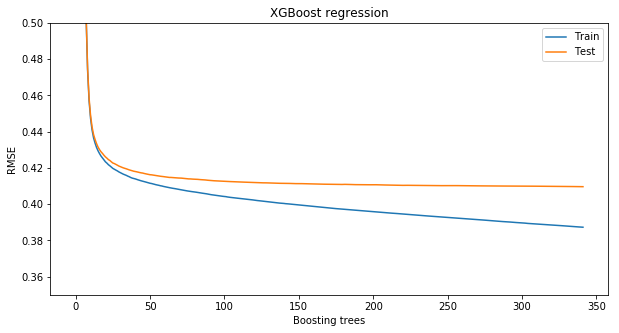

In [501]:
fselec.xgboost_learning_curve(cv_results_0, 
                              train_label='train-rmse-mean',
                              test_label='test-rmse-mean',
                              std_col=['train-rmse-std', 'test-rmse-std'],
                              y_lim=[0.35, 0.5]
                             )

With the current parameters we can see that as the number of bossters increases the variance or overfit occures since the corss validation error gets larger than the training error. So having fewer trees, leads to higher bias or underfittin. That is that the cross validating error is aproximatley equal to the training error.

If we were having infinite resources and not time constrains, a full grid search could be run with all the parameters together and find the optimal solution. It requires a lot of computational effort and we could find one model that could be closer to that optimal one that gives enough performance for our porpouse.

## Tuning the parameters that constraint the architecture or complexity of the trees: 
* ```max_depth``` is the maximum number of nodes allowed from the root to the last leaf of a tree. The deeper a tree is, the more it can model more complex relationships by adding more nodes. But if we go deeper, the splits become less relevant and are sometimes only due to noise, causing the model to overfit.

* ```min_child_weight``` is the number of samples (if all samples have a weight=1) required so it can be created a new node in the tree. When ```min_child_weight``` is small, it allows the algorithm to create children that correspond to fewer samples, thus allowing for more complex trees, but again, more likely to overfit (the children are learnig from few examples, therefore overfits).

Therefore, it is important to tune them together in order to find a good trade-off between model bias and variance
The following list contains all the combinations of both parameters to try.

In [523]:
gridsearch_params_complx = [(max_depth, min_child_weight) 
                            for max_depth in range(2,6)
                            for min_child_weight in range(1,7)]

In [524]:
len(gridsearch_params_complx)

24

In [526]:
min_test_err, min_train_err, boost_rounds = mselec.grid_search(gridsearch_params=gridsearch_params_complx,
                                                                orignal_params=params,
                                                                param_list_name=['max_depth', 'min_child_weight'],
                                                                dtrain=dtrain,
                                                                num_boost_round=num_boost_round,
                                                                seed=42,
                                                                nfold=5,
                                                                metrics={'rmse'},
                                                                early_stopping_rounds=10)

CV for max_depth=2 and min_child_weight=1
\RMSE 0.4133748 for 411 rounds
CV for max_depth=2 and min_child_weight=2
\RMSE 0.41313880000000003 for 445 rounds
CV for max_depth=2 and min_child_weight=3
\RMSE 0.414112 for 319 rounds
CV for max_depth=2 and min_child_weight=4
\RMSE 0.41294060000000005 for 457 rounds
CV for max_depth=2 and min_child_weight=5
\RMSE 0.41300879999999995 for 461 rounds
CV for max_depth=2 and min_child_weight=6
\RMSE 0.41316319999999995 for 405 rounds
CV for max_depth=3 and min_child_weight=1
\RMSE 0.4096676 for 342 rounds
CV for max_depth=3 and min_child_weight=2
\RMSE 0.40961559999999997 for 321 rounds
CV for max_depth=3 and min_child_weight=3
\RMSE 0.4097759999999999 for 305 rounds
CV for max_depth=3 and min_child_weight=4
\RMSE 0.40985999999999995 for 292 rounds
CV for max_depth=3 and min_child_weight=5
\RMSE 0.4099478 for 279 rounds
CV for max_depth=3 and min_child_weight=6
\RMSE 0.4094976 for 305 rounds
CV for max_depth=4 and min_child_weight=1
\RMSE 0.408722

58 minutes execution time

We get the best score with a max_depth of 5 and min_child_weight of 6, so let's update the params

In [528]:
# updating the dicitonary with the optimal values found 
params['max_depth'] = 5
params['min_child_weight'] = 6

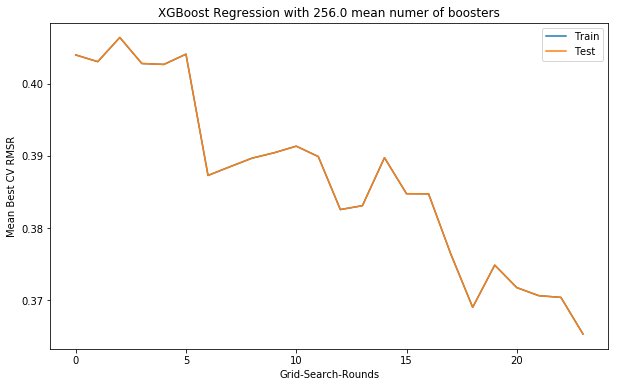

In [530]:
# I my remove this, I am just checking 
mselec.grid_search_rounds(min_test_err, min_train_err, boost_rounds, y_limit=None)

## Tuning the parameters control the sampling of the data set at each boosring round. 

What they do is that instead of allowing the whole data set to be used at every round, it builds a tree on slightly different data at each step. This approach is followed since it makes it less likely to overfit to a single sample or feature.

* ```subsample``` is the fraction of observations or rows to subsample at each step.The default is set to 1 meaning that is using the whole observations or rows.

* ```colsample_bytree``` is fraction of features/variables/columns to be used. The default is set to 1 meaning that is using all features.


In [539]:
gridsearch_params = [(subsample, colsample)
                    for subsample in [i/10. for i in range(5,11)]
                    for colsample in [i/10. for i in range(5,11)]
                    ]

In [540]:
len(gridsearch_params)

36

In [541]:
min_test_err_2, min_train_err_2, boost_rounds_2 = mselec.grid_search(gridsearch_params=gridsearch_params,
                                                                orignal_params=params,
                                                                param_list_name=['subsample', 'colsample_bytree'],
                                                                dtrain=dtrain,
                                                                num_boost_round=num_boost_round,
                                                                seed=42,
                                                                nfold=5,
                                                                metrics={'rmse'},
                                                                early_stopping_rounds=10)

CV for subsample=0.5 and colsample_bytree=0.5
\RMSE 0.4109284000000001 for 119 rounds
CV for subsample=0.5 and colsample_bytree=0.6
\RMSE 0.41133939999999997 for 108 rounds
CV for subsample=0.5 and colsample_bytree=0.7
\RMSE 0.411005 for 79 rounds
CV for subsample=0.5 and colsample_bytree=0.8
\RMSE 0.4100174 for 107 rounds
CV for subsample=0.5 and colsample_bytree=0.9
\RMSE 0.41121660000000004 for 83 rounds
CV for subsample=0.5 and colsample_bytree=1.0
\RMSE 0.4110296 for 92 rounds
CV for subsample=0.6 and colsample_bytree=0.5
\RMSE 0.41059340000000005 for 80 rounds
CV for subsample=0.6 and colsample_bytree=0.6
\RMSE 0.4101316 for 106 rounds
CV for subsample=0.6 and colsample_bytree=0.7
\RMSE 0.41066079999999994 for 80 rounds
CV for subsample=0.6 and colsample_bytree=0.8
\RMSE 0.41008300000000003 for 97 rounds
CV for subsample=0.6 and colsample_bytree=0.9
\RMSE 0.4098248 for 122 rounds
CV for subsample=0.6 and colsample_bytree=1.0
\RMSE 0.40943199999999996 for 103 rounds
CV for subsamp

We get the best parameters are subsample = 1.0, colsample_bytree = 0.8, so let's update the params.

In [543]:
params['subsample'] = 1
params['colsample_bytree'] = .8

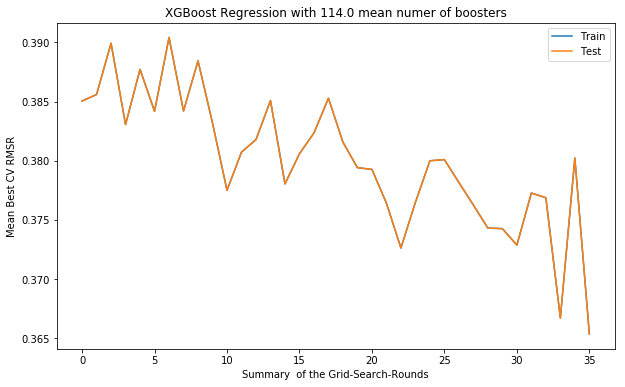

In [553]:
# I my remove this, I am just checking the path of the search
mselec.grid_search_rounds(min_test_err_2, min_train_err_2, boost_rounds_2, y_limit=None)

## Tuning the parameters that controls the learning and model regularisation

* ```eta``` alias ```learning_rate``` controls the shrinkage of the weights associated to features after each round, in other words it defines the amount of "correction" we make at each step. Remeber that that at each boosting round is correcting the errors of previous rounds. So having a small value of this parameter makes our model more robust to everfitting, so the smaller it is the most conservative it becomes. But the price to pay is to to increase the number of boosting rounds which takes more time to train, and sometimes without achiving great improvements.

* ```reg_lambda```L2 regularization term on weights. Increasing this value will make model more conservative to avoid overfitting.

In [548]:
learning_rate_val = [.2, .1, .05, .01, .005]

In [547]:
reag_lambda_val = [1e-5, 1e-2, 0.1, 1, 20]

In [550]:
gridsearch_params = [(learning_rate, reg_lambda)
                    for learning_rate in learning_rate_val
                    for reg_lambda in reag_lambda_val
                    ]

In [552]:
len(gridsearch_params)

25

In [554]:
min_test_err_3, min_train_err_3, boost_rounds_3 = mselec.grid_search(gridsearch_params=gridsearch_params,
                                                                orignal_params=params,
                                                                param_list_name=['learning_rate', 'reg_lambda'],
                                                                dtrain=dtrain,
                                                                num_boost_round=num_boost_round,
                                                                seed=42,
                                                                nfold=5,
                                                                metrics={'rmse'},
                                                                early_stopping_rounds=10)

CV for learning_rate=0.2 and reg_lambda=1e-05
\RMSE 0.40605840000000004 for 197 rounds
CV for learning_rate=0.2 and reg_lambda=0.01
\RMSE 0.40599679999999994 for 233 rounds
CV for learning_rate=0.2 and reg_lambda=0.1
\RMSE 0.405663 for 225 rounds
CV for learning_rate=0.2 and reg_lambda=1
\RMSE 0.405138 for 227 rounds
CV for learning_rate=0.2 and reg_lambda=20
\RMSE 0.40410399999999996 for 305 rounds
CV for learning_rate=0.1 and reg_lambda=1e-05
\RMSE 0.4045962 for 451 rounds
CV for learning_rate=0.1 and reg_lambda=0.01
\RMSE 0.4049488 for 349 rounds
CV for learning_rate=0.1 and reg_lambda=0.1
\RMSE 0.4046372 for 429 rounds
CV for learning_rate=0.1 and reg_lambda=1
\RMSE 0.40449840000000004 for 508 rounds
CV for learning_rate=0.1 and reg_lambda=20
\RMSE 0.40388900000000005 for 630 rounds
CV for learning_rate=0.05 and reg_lambda=1e-05
\RMSE 0.4046416 for 736 rounds
CV for learning_rate=0.05 and reg_lambda=0.01
\RMSE 0.40445080000000005 for 771 rounds
CV for learning_rate=0.05 and reg_lam

In [555]:
params['learning_rate'] = 0.1
params['reg_lambda'] = 20

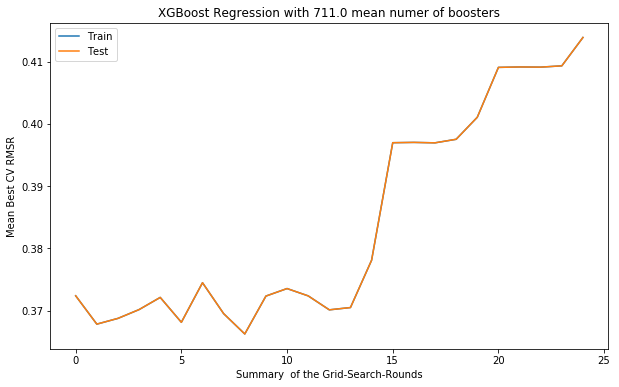

In [556]:
# I my remove this, I am just checking the path of the search
mselec.grid_search_rounds(min_test_err_3, min_train_err_3, boost_rounds_3, y_limit=None)

In [557]:
params_final = {'max_depth': 5,
                'min_child_weight': 6,
                'subsample': 1,
                'colsample_bytree': 0.8, 
                'learnig_rate': 0.1,
                'reg_lambda':20,
                # Other parameters
                'eval_metric': 'rmse',
                'objective':'reg:squarederror',
                'random_state':0,
                'eval_metric': 'rmse',
                'importance_type':'gain'}

## Training  the model

Finding the optimal  value of ```num_boost_round optimal``` highly depends on the other parameters, and thus it should be re-tuned each time you update a parameter. In the CV we did something simmilar for fidning the best other paremeters, but now that we have the final set, it is the tunr to find the optimal number of bosters. Let's see how much we improve our base line score, and the one from the untune model.

In [558]:
model_1 = xg.train(params_final,
                    dtrain,
                    num_boost_round=num_boost_round,
                    evals=[(dtest, "Test")],
                    early_stopping_rounds=10)

[0]	Test-rmse:2.74821
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:1.95645
[2]	Test-rmse:1.41267
[3]	Test-rmse:1.04099
[4]	Test-rmse:0.795654
[5]	Test-rmse:0.639823
[6]	Test-rmse:0.544464
[7]	Test-rmse:0.490261
[8]	Test-rmse:0.459699
[9]	Test-rmse:0.442959
[10]	Test-rmse:0.433528
[11]	Test-rmse:0.428243
[12]	Test-rmse:0.425162
[13]	Test-rmse:0.421073
[14]	Test-rmse:0.41981
[15]	Test-rmse:0.418227
[16]	Test-rmse:0.416692
[17]	Test-rmse:0.416155
[18]	Test-rmse:0.41545
[19]	Test-rmse:0.414913
[20]	Test-rmse:0.414349
[21]	Test-rmse:0.413922
[22]	Test-rmse:0.412889
[23]	Test-rmse:0.412327
[24]	Test-rmse:0.411519
[25]	Test-rmse:0.411185
[26]	Test-rmse:0.410847
[27]	Test-rmse:0.410469
[28]	Test-rmse:0.410332
[29]	Test-rmse:0.409838
[30]	Test-rmse:0.409817
[31]	Test-rmse:0.409257
[32]	Test-rmse:0.409033
[33]	Test-rmse:0.409034
[34]	Test-rmse:0.408891
[35]	Test-rmse:0.40881
[36]	Test-rmse:0.408246
[37]	Test-rmse:0.40823
[38]	Test-rmse:0.408089
[39]	Test-rmse:0.407953
[

In [576]:
print("Best RMSE: {:.4f} with {} rounds".format(
                 model_1.best_score,
                 model_1.best_iteration + 1))

Best RMSE: 0.4010 with 185 rounds


In [577]:
# If early stop happens
model_1.best_ntree_limit

185

```ntree_limit```is an integer number that limits the number of trees in the prediction; defaults to ```best_ntree_limit``` if defined (i.e. it has been trained with early stopping), otherwise 0 (use all trees).

In [561]:
# model prediction given the trees it was trained on
pred_model_1 = model_1.predict(dtest, ntree_limit=model_1.best_ntree_limit) 
pred_model_1

array([4.7866626, 3.9468818, 3.9788494, ..., 3.5418296, 3.7649052,
       3.564979 ], dtype=float32)

In [605]:
rmse_tuned = RMSE(y_test, pred_model_1)
print("Tuned before num_bust_dound and limit the trees for early stop RMSE is {:.4f}".format(rmse_tuned))

Tuned before num_bust_dound and limit the trees for early stop RMSE is 0.4010


In [564]:
np.exp(rmse_tuned)

1.4932902495924283

In [565]:
# If we do not provide the best_ntree_limit it will use all the trees
pred_model_1_f = model_0.predict(dtest) 
pred_model_1_f

array([4.761504 , 4.028127 , 4.0305753, ..., 3.463641 , 4.0732265,
       3.5616286], dtype=float32)

In [604]:
# Compute RMSE
rmse_tuned_f = RMSE(y_test, pred_model_1_f)
print("Tuned before num_bust_dound and full trees RMSE is {:.4f}".format(rmse_tuned_f))

Tuned before num_bust_dound RMSE is 0.4057


In [586]:
np.exp(rmse_tuned_f)

1.5004076531061519

In [588]:
cv_results_f = xg.cv(params, 
                      dtrain,
                      num_boost_round=num_boost_round,
                      seed=42,
                      nfold=5,
                      metrics={'rmse'},
                      early_stopping_rounds=10)

In [589]:
cv_results_f.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,3.516076,0.001923,3.516110,0.008411
1,3.172826,0.001972,3.172695,0.008306
2,2.864455,0.001642,2.864340,0.008585
3,2.587487,0.001706,2.587398,0.008446
4,2.338833,0.001545,2.338736,0.008511


In [590]:
cv_results_f.shape

(630, 4)

In [591]:
cv_results_f['test-rmse-mean'].argmin()

629

train-rmse-mean 0.3723254
test-rmse-mean 0.40388900000000005
train-rmse-std 0.0009589866735257723
test-rmse-std 0.0059781700210014095


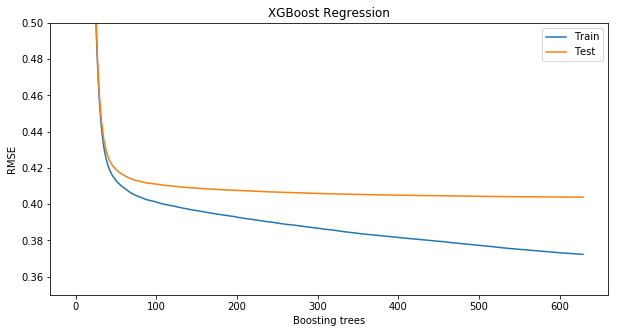

In [592]:
fselec.xgboost_learning_curve(cv_results_f, 
                              train_label='train-rmse-mean',
                              test_label='test-rmse-mean',
                              std_col=['train-rmse-std', 'test-rmse-std'],
                              y_lim=[0.35, 0.5]
                             )

Although it was found the best number of rounds, as we mentioned before, it has been trained with more rounds than optimal. Therefore, before using it for predictions, it should be retrained with the good number of rounds. Since ```best num_boost_round``` was found, there is no need the early_stopping_round anymore.

In [595]:
num_boost_round = model_1.best_iteration + 1
num_boost_round

185

In [596]:
model_final = xg.train(params_final,
                       dtrain,
                       num_boost_round=num_boost_round,
                       evals=[(dtest, "Test")])

[0]	Test-rmse:2.74821
[1]	Test-rmse:1.95645
[2]	Test-rmse:1.41267
[3]	Test-rmse:1.04099
[4]	Test-rmse:0.795654
[5]	Test-rmse:0.639823
[6]	Test-rmse:0.544464
[7]	Test-rmse:0.490261
[8]	Test-rmse:0.459699
[9]	Test-rmse:0.442959
[10]	Test-rmse:0.433528
[11]	Test-rmse:0.428243
[12]	Test-rmse:0.425162
[13]	Test-rmse:0.421073
[14]	Test-rmse:0.41981
[15]	Test-rmse:0.418227
[16]	Test-rmse:0.416692
[17]	Test-rmse:0.416155
[18]	Test-rmse:0.41545
[19]	Test-rmse:0.414913
[20]	Test-rmse:0.414349
[21]	Test-rmse:0.413922
[22]	Test-rmse:0.412889
[23]	Test-rmse:0.412327
[24]	Test-rmse:0.411519
[25]	Test-rmse:0.411185
[26]	Test-rmse:0.410847
[27]	Test-rmse:0.410469
[28]	Test-rmse:0.410332
[29]	Test-rmse:0.409838
[30]	Test-rmse:0.409817
[31]	Test-rmse:0.409257
[32]	Test-rmse:0.409033
[33]	Test-rmse:0.409034
[34]	Test-rmse:0.408891
[35]	Test-rmse:0.40881
[36]	Test-rmse:0.408246
[37]	Test-rmse:0.40823
[38]	Test-rmse:0.408089
[39]	Test-rmse:0.407953
[40]	Test-rmse:0.407955
[41]	Test-rmse:0.407586
[42]	Test-

In [597]:
# If we do not provide the best_ntree_limit it will use all the trees
pred_model_f_f = model_final.predict(dtest) 
pred_model_f_f

array([4.7866626, 3.9468818, 3.9788492, ..., 3.5418296, 3.7649052,
       3.564979 ], dtype=float32)

In [603]:
# Compute RMSE
rmse_tuned_f_f = RMSE(y_test, pred_model_f_f)
print("Final RMSE is {:.4f}".format(rmse_tuned_f_f))

Final RMSE is 0.4010


In [601]:
np.exp(rmse_tuned_f_f)

1.4932902266995718

In [602]:
model_final.save_model("price_model_fina_01.model")

In [607]:

1 - 1.4932902266995718 / 1.500267902847709

0.004650953429645943

# Predictin price for th whole data set

In [608]:
# Predict all the preices in the data set
all_data = xg.DMatrix(df[var_4_list])

In [609]:
pred_model_all = model_final.predict(all_data) 

In [611]:
# Price is in log scale so we need to convert it back
df_c = df.copy()

In [612]:
df_c['predicted_price_log_01'] = pred_model_all

In [613]:
df_c['predicted_price_01'] = np.exp(pred_model_all)

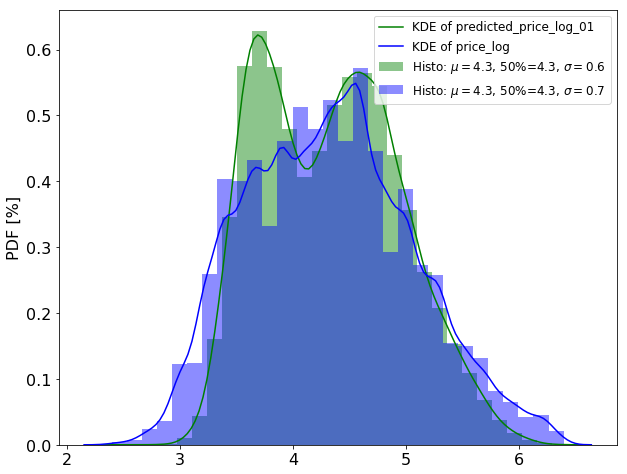

In [627]:
fig, ax = plt.subplots(figsize=(10,8))
mtool.plotting_one_kde(df_c, 'predicted_price_log_01', ax=ax, color='g')
mtool.plotting_one_kde(df_c, 'price_log', ax=ax, color='b')
None

In [633]:
df_c[['price_log', 'predicted_price_log_01']].describe()

,price_log,predicted_price_log_01
count,76114.000000,76114.000000
mean,4.327777,4.328382
std,0.732286,0.614449
min,2.397895,2.439949
25%,3.761200,3.794857
50%,4.317488,4.325776
75%,4.820282,4.779649
max,6.395262,6.429132


In [634]:
# skewd rigtt and more in the original price
df_c.agg({"price_log": ["median", "skew"], "predicted_price_log_01": ["median", "skew"] })

,price_log,predicted_price_log_01
median,4.317488,4.325776
skew,0.238069,0.264721


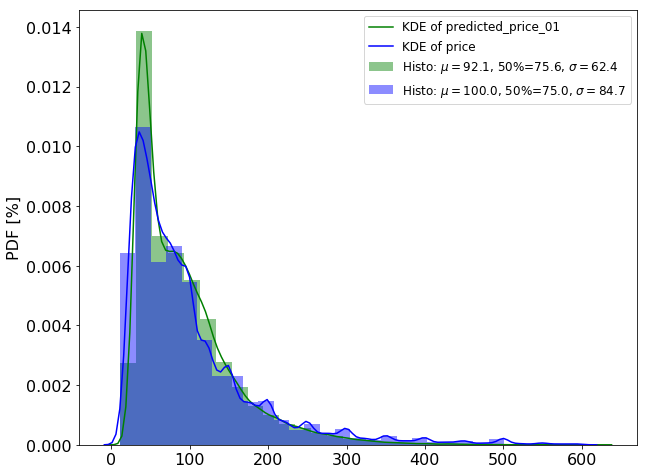

In [629]:
fig, ax = plt.subplots(figsize=(10,8))
mtool.plotting_one_kde(df_c, 'predicted_price_01', ax=ax, color='g')
mtool.plotting_one_kde(df_c, 'price', ax=ax, color='b')
None

In [630]:
df_c[['price', 'predicted_price_01']].describe()

,price,predicted_price_01
count,76114.00000,76114.000000
mean,100.02569,92.095139
std,84.67674,62.409222
min,11.00000,11.472450
25%,43.00000,44.471886
50%,75.00000,75.624199
75%,124.00000,119.062555
max,599.00000,619.635864


In [632]:
# skewd rigtt and more in the original price
df_c.agg({"price": ["median", "skew"], "predicted_price_01": ["median", "skew"] })

,price,predicted_price_01
median,75.000000,75.624199
skew,2.232381,1.738176


The standard deviation of the price for the prediction is £64.4, which is smaller than the standar deviation of £ 84.7 in the listings' price. The median for both is similar and better mesure to compare since both distribuions are skewd. 

In [624]:
#df_c.to_pickle(os.path.join(path_input, 'extended_data_set_pred_01.pick'))